# Bank Wages in the US

You are interested in working in the bank business? 

Let's look at some data from employees that work at banks to check:
* How many years of education do you need for certain jobs?
* How does the salary differ by the different job types? 
    ** And how is it influenced by education?
* Is there a difference in salary based on gender and minority

Additionally:
* Can we model and calculate your possible future salary


In [2]:
# Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sns.set_theme(style="ticks", palette="pastel")

In [3]:
# Read table

wages = pd.read_table("us_bank_wages/us_bank_wages.txt", header=0,index_col=0)
wages.columns = [c.lower() for c in wages.columns]

wages.head()

,salary,educ,salbegin,gender,minority,jobcat
0,57000,15,27000,1,0,3
1,40200,16,18750,1,0,1
2,21450,12,12000,0,0,1
3,21900,8,13200,0,0,1
4,45000,15,21000,1,0,1


In [6]:
wages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 0 to 473
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   salary    474 non-null    int64 
 1   educ      474 non-null    int64 
 2   salbegin  474 non-null    int64 
 3   gender    474 non-null    object
 4   minority  474 non-null    object
 5   jobcat    474 non-null    object
dtypes: int64(3), object(3)
memory usage: 25.9+ KB


There are no missing values in any of the variables. Hence, we can just go ahead and use the data set as is.

## What is in the data set?

First things first. This is the information we've got: entry salary, current salary at the same bank, job categories, years of finished education, gender, minority

### Salaries

In [5]:
wages.salbegin.describe()

count      474.000000
mean     17016.086498
std       7870.638154
min       9000.000000
25%      12487.500000
50%      15000.000000
75%      17490.000000
max      79980.000000
Name: salbegin, dtype: float64

In [ ]:
wages.salary.describe()

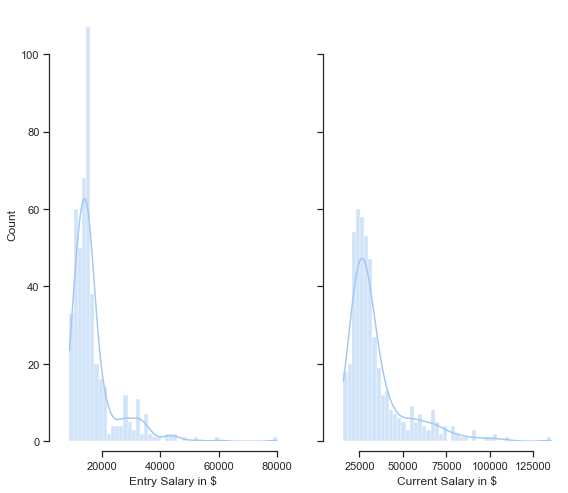

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(9, 8))

#plt.figure(figsize=(9, 8))
sns.histplot(data= wages, x='salbegin', bins=50, kde=True, ax = ax1).set(xlabel='Entry Salary in $')
#ax1.set_title('Entry Salary in $')

#plt.figure(figsize=(9, 8))
sns.histplot(data= wages, x='salary', bins=50, kde=True, ax = ax2).set(xlabel='Current Salary in $')
#ax2.set_title('Current Salary in $')

sns.despine(offset=10, trim=True)

On the left we see the salary the employees received when the started working at their current bank. These entry salaries are skewed right, some outliers lie above ~60,000 Dollar. 
On the right we can see the distribution of the current salary of the same employees. Note, that the values of the x-axis are higher than of the left plot. These salaries are also skewed right, though the salaries have increased (in some cases substantially), some outliers are above ~100,000 Dollar. We don't know how long each of the employees has been working at their current bank to achieve their individual pay raise.

Here you can see that the entry salary is positively correlated with the current salary.

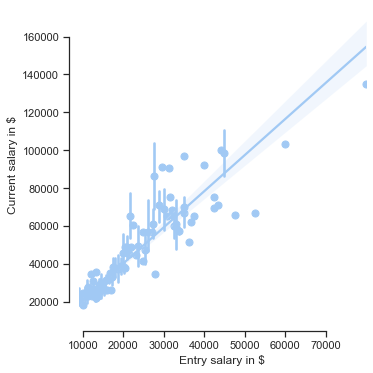

In [28]:
sns.lmplot(x='salbegin',y='salary',data=wages,x_estimator=np.mean
          ).set(xlabel='Entry salary in $',ylabel ='Current salary in $')
sns.despine(offset=10, trim=True)

### Job categories

There are three different job categories: management (jobcat 3), administration (jobcat 3) and custodial jobs (jobcat 2):

In [42]:
wages['jobcat'].value_counts()

1    363
3     84
2     27
Name: jobcat, dtype: int64

There are 363 people working in administration, 84 in management positions and 27 as custodian.

### Years of finished education

In [43]:
wages['educ'].value_counts()

12    190
15    116
16     59
8      53
19     27
17     11
18      9
14      6
20      2
21      1
Name: educ, dtype: int64



|Years of finished education|Degree|No. of employees|
|-----|--------| -------|
|8|Junior High School Diploma   | 53 |
|12 |High School Diploma     | 190 |
|14 - 16 | Undergraduate | 181 |
|17 - 21 |Graduate  | 50|

In [14]:
# Generate categories for the degree received based on number of finished years of education
# Thanks to Lena (lima-tango) for the idea!

def map_educ(x):
    if x == 8: return "Junior High School"
    elif x == 12: return "High School"
    elif x == 14 or x <= 16: return "Undergraduate"
    elif x == 17 or x <= 21: return "Graduate"
wages["cat_educ"] = pd.Categorical(wages.educ.apply(map_educ), 
                ['Junior High School', 'High School', "Undergraduate", "Graduate"])

High School           190
Undergraduate         181
Junior High School     53
Graduate               50
Name: cat_educ, dtype: int64

Based on the Degree levels offered in the US, we'd assume there are 53 and 190 people employed with a Junior High or High School Diploma, 181 employees have a undergraduate degree (Associate's or Bachelor's degree) and 88 employees earned a graduate degrees (Master's or Doctoral degree).

### Gender and minorities

Gender and minorities have been recorded as binary options: male or female and yes or no, respectively.

In [50]:
wages['gender'].value_counts()

male      258
female    216
Name: gender, dtype: int64

In [52]:
wages['minority'].value_counts()

non-minority    370
minority        104
Name: minority, dtype: int64

In terms of gender, the employees are almost in parity. There are 258 male and 216 female employees. Though, there are only 104 people who identify as minority (vs. 370 employees who don't).

## What story does the data set tell?

By looking at the pure numbers we get a feelign for the data but we still don't know who earns what (doing what job). So let's get back to our intial questions.

### How many years of education do you need for certain jobs?

In [13]:
# replace 0 and 1 with respective answer
# easier to plot
wages['gender'].replace({0: 'Female', 1: 'Male'}, inplace=True)
wages['minority'].replace({0: 'Non-minority', 1: 'Minority'},inplace=True)
wages['jobcat'].replace({1: 'Administration', 2: 'Custodian', 3: 'Management'},inplace=True)

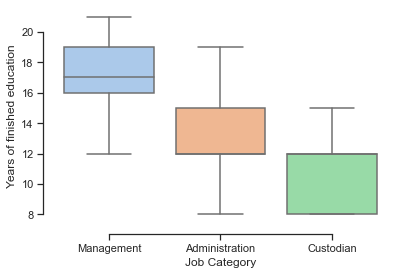

In [14]:
sns.boxplot(x='jobcat', y='educ',data=wages).set(xlabel='Job Category')
plt.ylabel("Years of finished education")
sns.despine(offset=10, trim=True)
plt.show()

In management, the majority of the employees hold a graduate degree (17 to 21 years of finished education) whereas administrative personell mostly have an undergraduate degree. Custodial jobs are mostly performed by people who have graduated junior or high school. Exceptions can be found in each category, for example a high school graduate may work in management and in contrast a undergraduate as a custodian.

**Answer:**
For a job in Management the applicant should at least hold a High School Diploma, though a graduate degree is preferred. For a job in administration, you should at least have graduated Junior High School but you may be more succesful when you have a High School diploma or undergraduate degree. When applying for a custodial job you should have a Junior High School Diploma.

## How does the salary differ by the different job types?

In [94]:
print(wages['salbegin'].groupby(wages['jobcat']).median())
wages['salbegin'].groupby(wages['jobcat']).describe()

jobcat
Administration    14100
Custodian         15750
Management        28740
Name: salbegin, dtype: int64


,count,mean,std,min,25%,50%,75%,max
jobcat,,,,,,,,
Administration,363.0,14096.046832,2907.474152,9000.0,11550.0,14100.0,15750.0,31980.0
Custodian,27.0,15077.777778,1341.234602,9000.0,15000.0,15750.0,15750.0,15750.0
Management,84.0,30257.857143,9980.979389,15750.0,23062.5,28740.0,34057.5,79980.0


In [95]:
print(wages['salary'].groupby(wages['jobcat']).median())
wages['salary'].groupby(wages['jobcat']).describe()

jobcat
Administration    26550
Custodian         30750
Management        60500
Name: salary, dtype: int64


,count,mean,std,min,25%,50%,75%,max
jobcat,,,,,,,,
Administration,363.0,27838.539945,7567.994961,15750.0,22800.00,26550.0,31200.00,80000.0
Custodian,27.0,30938.888889,2114.616411,24300.0,30150.00,30750.0,30975.00,35250.0
Management,84.0,63977.797619,18244.775970,34410.0,51956.25,60500.0,71281.25,135000.0


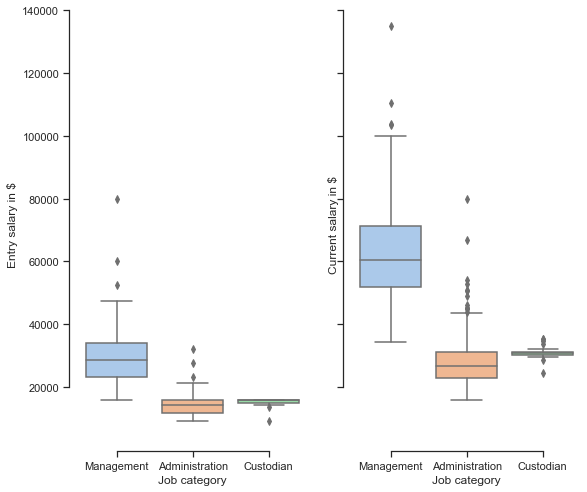

In [87]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize = (9, 8))

sns.boxplot(x = 'jobcat', y = 'salbegin',data = wages, ax = ax1, 
           ).set(xlabel='Job category',ylabel ='Entry salary in $')
sns.boxplot(x = 'jobcat', y = 'salary',data = wages, ax = ax2, 
           ).set(xlabel='Job category',ylabel ='Current salary in $')

sns.despine(offset=10, trim=True)

When looking at the salaries we should differentiate between the entry salary and the current salary of an employee (at the same bank). Even though we don't have any information about the duration of the employment, we can deduce what increase in salary can be achieved. Some of these increases are quite substantial.

The median entry salary for an **admininstrational job** (the value that is in the middle and separates the lower from the higher half) is 14100 Dollar. This salary may increase to 26550 Dollar (also median). But the entry salary and the current salary may be as high as 31980 Dollar and 80000 Dollar, respectively. 

In **Management**, the median entry salary is 28740 Dollar and the median of the current salary is 60500 Dollar. Again, the entry salary and the current salary may be as high as 79980 Dollar and 135000 Dollar, respectively. 

Employees performing **custodial jobs** may start a job with 15750 Dollar (median) and currently earn 30750 Dollar (median). Both of these values are the exact or fairly close maximum salaries.

**Answer:**
Each job category has very different increases in salary. As said before, we don't know how long these employees have been working at the bank, but the current salaries show what is possible and what you once may earn at a bank.
Depending on the job you want to perform at a bank (administration, management, custodian) you can use the information on entry salary to negotiate your personal entry salary. 

We should check how your academic degrees affect the salary to be able to form a better decision.

## How does the salary differ by the different job types - and how is it influenced by education?

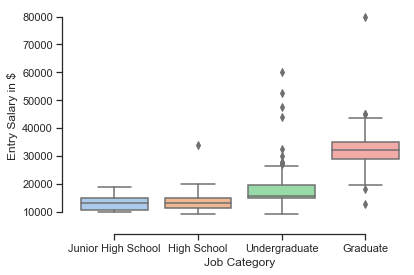

In [16]:
sns.boxplot(x="cat_educ", y="salbegin", data=wages,
           ).set(ylabel = "Entry Salary in $", xlabel='Job Category')

sns.despine(offset=10, trim=True)

You can see that a higher educational degree results in a higher entry salary, in general. But how is this distributed for the three job categories?

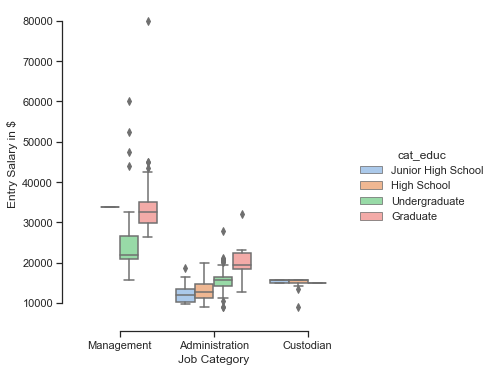

In [135]:
sns.catplot(x = 'jobcat', y = 'salbegin',data = wages, hue = 'cat_educ', kind='box',
           ).set(ylabel = "Entry Salary in $", xlabel='Job Category')

sns.despine(offset=10, trim=True)

These are the median entry salaries (in Dollar) for the different Job Categories and Level of Education:

In [21]:
pd.pivot_table(index='jobcat',columns='cat_educ',aggfunc ="median",values='salbegin', data=wages)

cat_educ,Junior High School,High School,Undergraduate,Graduate
jobcat,,,,
Administration,12000.0,12750.0,15750.0,19500.0
Custodian,15750.0,15750.0,15000.0,NaN
Management,NaN,33750.0,21990.0,32490.0


**Answer:**
Since you are job hunting, let's look at the entry salaries. As you may have suspected the entry salary increases with level of education. The difference for job starters with a graduate degree (particularly in management: 32490 Dollar vs 19500 Dollar in administrataion, both are medians) is considerable. Though, you must think about the costs of your studies that you will have spent until you've earned a graduate degree. Though, it should pay off in the long run as you can see below. Undergraduates rarely catch up (for instance: 38100 Dollar in management) with their colleagues that earned a graduate degree. For instance in management an undergraduate may earn up to 38100 Dollar (median) whereas a graduate may earn about 30000 Dollar more.

Again, the note: we do not know how long each individual has been working at the bank. This may also influence the current salary. Same goes for the entry salary.

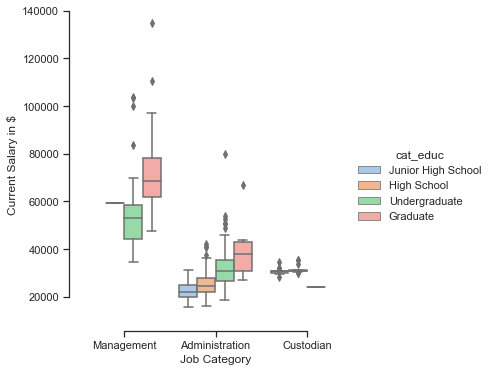

In [17]:
sns.catplot(x = 'jobcat', y = 'salary',data = wages, hue = 'cat_educ', kind='box',
           ).set(ylabel = "Current Salary in $", xlabel='Job Category')

sns.despine(offset=10, trim=True)

These are the median current salaries (in Dollar) for the different Job Categories and Level of Education:

In [22]:
pd.pivot_table(index='jobcat',columns='cat_educ',aggfunc ="median",values='salary', data=wages)

cat_educ,Junior High School,High School,Undergraduate,Graduate
jobcat,,,,
Administration,21900.0,24525.0,30900.0,38100.0
Custodian,30750.0,30750.0,24300.0,NaN
Management,NaN,59400.0,53125.0,68437.5


## Is there a difference in salary based on gender and minority

Let's first look at difference in gender:

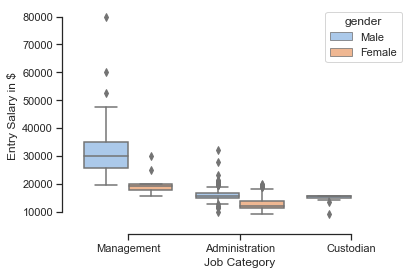

In [9]:
sns.boxplot(x="jobcat", y="salbegin", hue="gender", data=wages
           ).set(ylabel = "Entry Salary in $", xlabel='Job Category')

sns.despine(offset=10, trim=True)

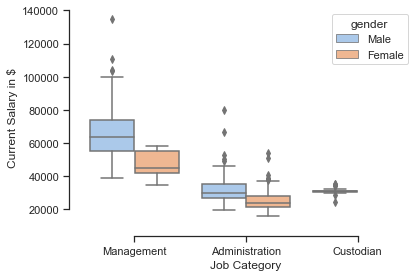

In [10]:
sns.boxplot(x="jobcat", y="salary", hue="gender", data=wages
           ).set(ylabel = "Current Salary in $", xlabel='Job Category')

sns.despine(offset=10, trim=True)

You can see that, men usally receive a higher entry salary than women, particularly in Management. The salaries of women catch up with the men's while working at the bank, but are still lower.

Now let's bring in the effect of minorities.

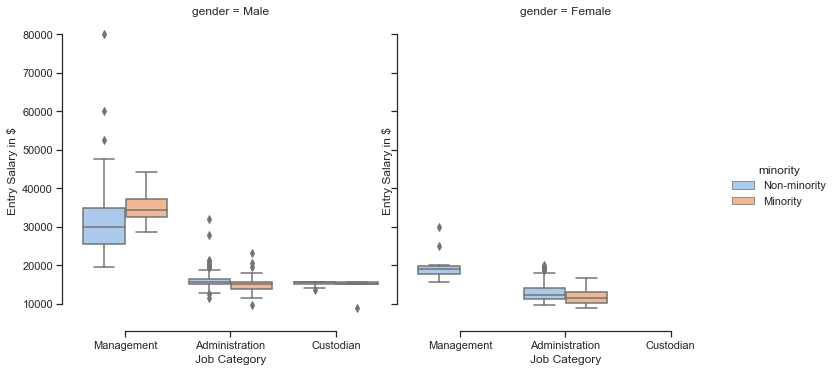

In [133]:
sns.catplot(x="jobcat", y="salbegin", hue="minority", kind='box',
                col="gender", data=wages).set(ylabel = "Entry Salary in $", xlabel='Job Category')

sns.despine(offset=10, trim=True)

**Answer:** As mentioned above: gender does have an effect on the entry salary. Male colleagues earn more compared to their female counterparts. Being a minority seems not to affect entry salaries in administration, but it may result in a higher entry salary for management. There are no female employees identifying as minority in management and neither are there female custodian workers.

The same holds true when looking at the current salaries of the employees.

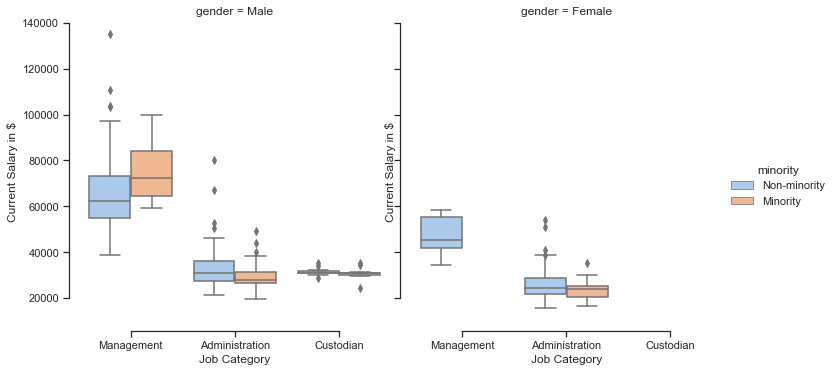

In [11]:
sns.catplot(x="jobcat", y="salary", hue="minority", kind='box',
                col="gender", data=wages).set(ylabel = "Current Salary in $", xlabel='Job Category')

sns.despine(offset=10, trim=True)

**Tip for women:**
When applying for jobs and finally negotiating about a salary keep in mind what your male counterparts may be asking for and maybe earning. As said before, if you are interested in working in management, you may be asking for too little (compared to your male colleagues).

# What are the key findings?

* Education
    * Management: at least hold a High School Diploma but a graduate degree will certainly increase your salary. 
    * Administration: at least have graduated Junior High School but you may be more succesful when you have a High School diploma or undergraduate degree. 
    * Custodial job: you should have a Junior High School Diploma.

* Job Categories
   * Management: you may have earn the highest entry and current salary in this position
   * Adminstration: salaries in this category are substantially lower than in Management, but do increase during employment
   * Custodial Jobs: salaries are similar to administraion salaries but do not increase as much

* Education and Job Categories
   * Entry salary increases with level of education. 
   * The difference for job starters with a graduate degree is considerable (particularly in Management).
   * Undergraduates rarely catch up (in terms of salary) with their colleagues that earned a graduate degree.

* Gender and Minorities
   * Gender does have an effect on the entry salary. Male colleagues earn more compared to their female counterparts. 
   * Being a minority seems not to affect entry salaries in administration, but it may result in a higher entry salary for management. 
   
* General tip
When applying for jobs and finally negotiating about a salary keep in mind what your male counterparts may be asking for and maybe earning. If you are interested in working in management, you may be asking for too little (compared to your male colleagues).

* NOTE
We do not know how long each individual has been working at the bank. This may also influence the current salary. Same goes for the entry salary. We don't know how job experience may influence the entry salary.

## The Model

We've created a model that calculates your future salary by putting in your entry salary, your years of education (finished), your gender, your job category and if you belong to a minority.

The model underpredicts by about 1312 Dollar. So, you may actually earn a bit more than what the model predicts. Again, as mentioned before, we don't know WHEN you will earn this calculated future salary but is well possible that you can reach the calculated amount.

You can find script for the model [here]().